# Pattern Recognition 2019 - 2020
## First Set of Analytical Exercises
#### Christos Lamprakos, 03002910

### Exercise 1.4b

As derived in question **a**, the likelihood function is non-zero if and only if the following conditions hold:

$$x_i \geq 0 \, \forall \,i \in \{ 0, 1 ... n \} \\ max\{ x_1, x_2 ... x_n \} \leq \theta$$

Then, its value is given by $L(\theta) = ({1 \over \theta})^n$, and the maximum likelihood solution is given by $\hat{\theta}=max\{ x_1, x_2 ... x_n \}$.

The code snippet below plots $L(\theta)$ for $0 \leq \theta \leq 1$. 

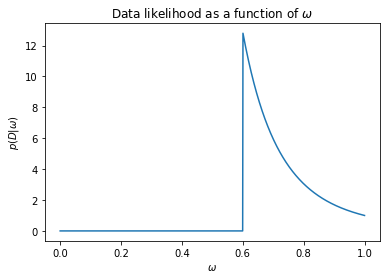

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Given by the exercise
n = 5
#Make theta array
theta = np.linspace (0, 1, 1000)
#Likelihood is zero everywhere...
y = np.zeros (theta.size)
#...except from where theta is equal or greater than the max likelihood estimate!
y[theta >= 0.6] = theta[theta >= 0.6] ** (-n)
plt.plot (theta, y)
#For some reason, Python doesn't want to show $\theta$. We replaced it with $\omega$
plt.ylabel ('$p(D|\omega)$')
plt.xlabel ('$\omega$')
plt.title ('Data likelihood as a function of $\omega$')
plt.show ()

### Exercise 1.6a

We first create the sample vectors:

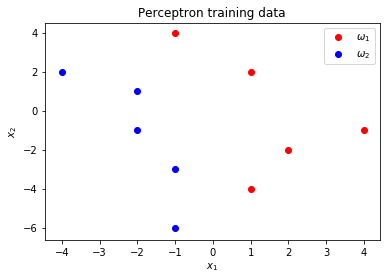

In [3]:
x_1 = np.array ([-1, 1, 2, 1, 4])
y_1 = np.array ([4, 2, -2, -4, -1])
x_2 = np.array ([-4, -2, -2, -1, -1])
y_2 = np.array ([2, 1, -1, -3, -6])

fig = plt.figure ()
ax = fig.add_subplot(111)
ax.scatter (x_1, y_1, color = 'red', label = '$\omega_1$')
ax.scatter (x_2, y_2, color = 'blue', label = '$\omega_2$')
plt.legend (loc = 'best')
plt.xlabel ('$x_1$')
plt.ylabel ('$x_2$')
plt.title ('Perceptron training data')
plt.show ()

The dataset is linearly separable. Moving on to the perceptron training now. The first thing we should note is that the weight vector $\textbf{w} = [0, 0]^T$ is **not** enough, since it does not contain a bias term. Without a bias, the line drawn by the perceptron is obligated to cross the origin, and the training is either not flexible enough or impossible. For this reason, we expand all vectors according to the following form of the discriminant function:

$$g(\textbf{x})=\textbf{w}^T\textbf{x}+b \\ g(\textbf{x}) = \textbf{w}_e^T\textbf{x}_e \\ \textbf{w}_e = [b \ \ \textbf{w}]^T \\ \textbf{x}_e = [1 \ \  \textbf{x}]^T$$

We also merge all of our data in a single array (```train_data```), for easier manipulations. Each row of the array corresponds to a ```(features, pattern)``` tuple.

In [4]:
data_1 = np.vstack ((np.ones (x_1.size), x_1, y_1, np.zeros (x_1.size)))
data_2 = np.vstack ((np.ones (x_2.size), x_2, y_2, np.ones (x_2.size)))
train_data = np.vstack ((data_1.T, data_2.T))

w = np.array ([0, 0, 0])

Next, we define the perceptron training function. The main idea is to feed the perceptron repeatedly with the dataset, and stop training when it classifies all samples correctly.

Finished! Final weights are:  [ 8. 10.  2.]


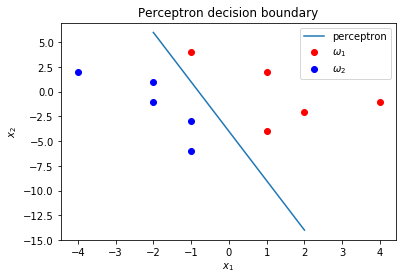

In [5]:
def perc_train (ro, weights, data):
    """
    This function trains a perceptron with initial weights on a sum of training data.
    If the data are linearly separable, the algorithm is guaranteed to converge.
    """
    finished = False
    while not finished:
        #In each epoch, we initially shuffle the training data.
        np.random.shuffle (data)
        #Then split the data in features and patterns.
        features = data[:, :3]
        patterns = data[:, 3]
        #We also assume that each epoch will be the last, unless misclassification happens.
        finished = True
        for i in range (data.shape[0]):
            #Calculate dot product
            res = np.dot (weights, features[i, :])
            #Learning rule
            if patterns[i] == 0 and res <= 0:
                weights += ro * features[i, :]
                finished = False
            elif patterns[i] == 1 and res >= 0:
                weights -= ro * features[i, :]
                finished = False
    print ('Finished! Final weights are: ', weights)
    return weights

final_weight = perc_train (1.0, w.astype (float), train_data)
x_lin = np.linspace (-2, 2, 1000)
fig = plt.figure ()
ax = fig.add_subplot(111)
ax.scatter (x_1, y_1, color = 'red', label = '$\omega_1$')
ax.scatter (x_2, y_2, color = 'blue', label = '$\omega_2$')
ax.plot (x_lin, - final_weight[1] / final_weight[2] * x_lin - final_weight[0] / final_weight[2], label = 'perceptron')
plt.legend (loc = 'best')
plt.xlabel ('$x_1$')
plt.ylabel ('$x_2$')
plt.title ('Perceptron decision boundary')
plt.show ()

The equation describing the perceptron decision boundary is thus:

$$b+w_1x_1+w_2x_2 = 0 \\ 8 + 10x_1+2x_2 = 0 \\ 4 + 5x_1 + x_2 = 0$$

### Exercise 1.7

The first thing we should do is create the dataset.

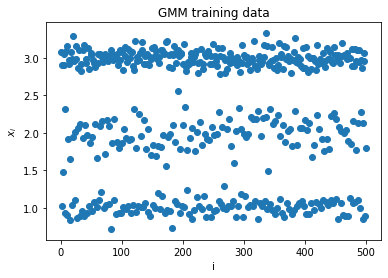

In [6]:
def mixtureData (pointsNum):
    """
    This function constructs a synthetic dataset as per
    the exercise description.
    """
    points = np.array ([])
    base = 0
    for i in range (pointsNum):
        #First 2 points belong to distribution 2, etc.
        if base == 0 or base == 1:
            points = np.hstack ((points, np.random.normal (3, 0.1)))
            base += 1
        elif base == 2:
            points = np.hstack ((points, np.random.normal (1, 0.1)))
            base += 1
        else:
            points = np.hstack ((points, np.random.normal (2, 0.2)))
            base = 0
    return points

data = mixtureData (500)
x = np.arange (500) + 1
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.scatter (x, data)
plt.xlabel ('i')
plt.ylabel ('$x_i$')
plt.title ('GMM training data')
plt.show ()

As can be seen above, the samples are indeed centered around the corresponding means. The over-representation of the second Gaussian, centered around 3, is also observable. The same holds for the larger spread of the third Gaussian.

To continue, we use the formulation of the EM algorithm as it is described in Bishop 9.2.2. We initialize $\mu_k$, $\sigma_k$ and $\pi_k$ with the help of a K-means pre-processing step.

In [35]:
from sklearn.cluster import KMeans

def initEM (data):
    """
    This function initializes the parameters of the Expectation Maximization
    algorithm. The only input needed is the data in question. A K-Means
    classifier is fit upon the data, and then:
        a) The cluster centroids are used as the initial EM mean values.
        b) Each cluster's sample variance is used as the respective EM parameter.
        c) The data fraction assigned to each cluster is used as the initial EM mixing coefficient.
    """
    buddy = KMeans (n_clusters = 3).fit (data.reshape (-1, 1))
    m_k = buddy.cluster_centers_.reshape (1, -1)[0]
    labels = buddy.labels_
    s_k = np.zeros(3)
    pi_k = np.zeros (3)
    for j in range (3):
        s_k[j] = np.var (data[labels == j])
        pi_k[j] = data[labels == j].size / data.size
    return m_k, s_k, pi_k
    
m_init, s_init, pi_init = initEM (data)
print ('K-means complete! Initial EM mean vector: ', m_init)
print ('Initial EM variance vector: ', s_init)
print ('Initial EM mixing coefficients: ', pi_init)

K-means complete! Initial EM mean vector:  [3.00315683 1.01329394 2.00442026]
Initial EM variance vector:  [0.01105663 0.01257372 0.03087746]
Initial EM mixing coefficients:  [0.502 0.256 0.242]


So we observe that the K-means did a fairly good job on the estimation of the means. The mixing coefficients are also quite accurate, since the Gaussian distribution with mean 3 indeed comprises double the samples of the other 2.

Thus, the EM algorithm is expected to contribute mostly in the sense of variance estimation. The code below implements the EM algorithm.

In [36]:
def getGauss (point, mean, var):
    """
    This function returns the pdf value of a point, based on a univariate
    normal distribution with the respective mean and variance.
    """
    return 1 / (np.sqrt (2 * np.pi * var)) * \
           np.exp (- (point - mean) ** 2 / (2 * var))

def expect (m_k, s_k, pi_k, data):
    """
    This function performs the Expectation step
    of the EM algorithm.
    """
    g_nk = np.zeros ((data.shape[0], 3))
    for i in range (data.shape[0]):
        s = 0
        for j in range (3):
            s += pi_k[j] * getGauss (data[i], m_k[j], s_k[j])
        for j in range (3):
            g_nk[i, j] = pi_k[j] * getGauss (data[i], m_k[j], s_k[j]) / s
    return g_nk

def maxim (g_nk, data):
    """
    This function performs the Maximization step
    of the EM algorithm.
    """
    n_k = g_nk.sum (axis = 0)
    pi_new = n_k / data.shape[0]
    gx = g_nk.T * data
    mk_new = gx.sum (axis = 1) / n_k
    base = np.ones ((3, data.shape[0]))
    data_exp = (base * data).T
    gy = g_nk * (data_exp - mk_new) ** 2
    sk_new = gy.sum (axis = 0) / n_k
    return mk_new, sk_new, pi_new

def eMWrapper (m_new, s_new, pi_new, data):
    """
    This function wraps the EM algorithm. As input, it accepts
    arbitrary values for all parameters.
    """
    iterations = 0
    m_old = m_new
    s_old = s_new
    pi_old = pi_new
    while True:
        iterations += 1
        new_g = expect (m_new, s_new, pi_new, data)
        m_new, s_new, pi_new = maxim (new_g, data)
        if np.all (m_old == m_new) and np.all (s_old == s_new) and np.all (pi_old == pi_new):
            break
        else:
            m_old = m_new
            s_old = s_new
            pi_old = pi_new
    print ('Converged after ', iterations, 'iterations.')
    print ('Means: ', m_new)
    print ('Vars: ', s_new)
    print ('Mix Coeffs: ', pi_new)
    return m_new, s_new, pi_new

m_final, s_final, pi_final = eMWrapper (m_init, s_init, pi_init, data)

Converged after  15 iterations.
Means:  [3.00488622 1.00559819 2.00024733]
Vars:  [0.01033556 0.00906934 0.03707099]
Mix Coeffs:  [0.50003367 0.25189075 0.24807558]


Based on the above output, we conclude that the EM algorithm did not contribute much to the mixture's parameter estimation. On the upside, the mean vector remained stable, and the same holds for the mixing coefficients. The variances are quite off-mark, even though the third variance is larger than the other 2, as it should.

To gain some further insight, we perform a couple of experiments with arbitrarily initialized values:

In [37]:
m_1, s_1, pi_1 = eMWrapper (np.array ([6.2, 1.1, 0.03]), np.array ([1.0, 0.01, 0.7]), \
                            np.array ([0.1, 0.1, 0.8]), data)
m_2, s_2, pi_2 = eMWrapper (np.random.rand (3), np.random.rand (3), np.array ([0.62, 0.18, 0.2]), data)

Converged after  22 iterations.
Means:  [3.00488622 1.00559819 2.00024733]
Vars:  [0.01033556 0.00906934 0.03707099]
Mix Coeffs:  [0.50003367 0.25189075 0.24807558]
Converged after  26 iterations.
Means:  [2.00024733 1.00559819 3.00488622]
Vars:  [0.03707099 0.00906934 0.01033556]
Mix Coeffs:  [0.24807558 0.25189075 0.50003367]


Interestingly enough, the algorithm converges to the exact same values. The only impact of K-Means is that of fewer iterations until convergence.

In conclusion, Expectation Maximization is indeed able to provide fairly accurate Gaussian Mixture Models (at least on synthetically generated data, and assuming some tolerance on the resulting variances).